# 【scikit-learn】学习Python来分类现实世界的数据

<http://jasonding1354.github.io/2014/12/25/Machine%20Learning/【scikit-learn】学习Python来分类现实世界的数据/>

In [23]:
%matplotlib inline

In [24]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
iris = datasets.load_iris()
irisFeatures = iris["data"]
irisFeaturesName = iris["feature_names"]
irisLabels = iris["target"]

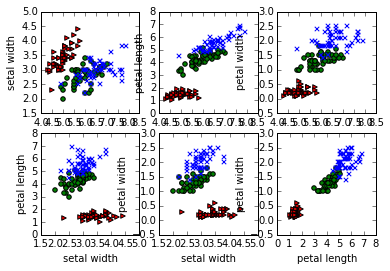

In [25]:
def scatter_plot(dim1, dim2):
    for t,marker,color in zip(xrange(3),">ox","rgb"):
        # zip()接受任意多个序列参数，返回一个元组tuple列表
        # 用不同的标记和颜色画出每种品种iris花朵的前两维数据
        # We plot each class on its own to get different colored markers
        plt.scatter(irisFeatures[irisLabels == t,dim1],
        irisFeatures[irisLabels == t,dim2],marker=marker,c=color)
    dim_meaning = {0:'setal length',1:'setal width',2:'petal length',3:'petal width'}
    plt.xlabel(dim_meaning.get(dim1))
    plt.ylabel(dim_meaning.get(dim2))

plt.subplot(231)
scatter_plot(0,1)
plt.subplot(232)
scatter_plot(0,2)
plt.subplot(233)
scatter_plot(0,3)
plt.subplot(234)
scatter_plot(1,2)
plt.subplot(235)
scatter_plot(1,3)
plt.subplot(236)
scatter_plot(2,3)
plt.show()

In [26]:
petalLength = irisFeatures[:,2] #select the third column,since the features is 150*4
isSetosa = (irisLabels == 0) #label 0 means iris Setosa
maxSetosaPlength = petalLength[isSetosa].max()
minNonSetosaPlength = petalLength[~isSetosa].min()

print ('Maximum of setosa:{0} '.format(maxSetosaPlength))
print ('Minimum of others:{0} '.format(minNonSetosaPlength))


Maximum of setosa:1.9 
Minimum of others:3.0 


In [27]:
# search the threshold between virginica and versicolor
irisFeatures = irisFeatures[~isSetosa]
labels = irisLabels[~isSetosa]
isVirginica = (labels == 2)	#label 2 means iris virginica
bestAccuracy = -1.0
for fi in xrange(irisFeatures.shape[1]):
    thresh = irisFeatures[:,fi].copy()
    thresh.sort()
    for t in thresh:
        pred = (irisFeatures[:,fi] > t)
        acc = (pred == isVirginica).mean()
        if acc > bestAccuracy:
            bestAccuracy = acc;
            bestFeatureIndex = fi;
            bestThreshold = t;
print 'Best Accuracy:\t\t',bestAccuracy
print 'Best Feature Index:\t',bestFeatureIndex
print 'Best Threshold:\t\t',bestThreshold
 

Best Accuracy:		0.94
Best Feature Index:	3
Best Threshold:		1.6


In [28]:
def learn_model(features,labels):
    bestAccuracy = -1.0
    for fi in xrange(features.shape[1]):
        thresh = features[:,fi].copy()
        thresh.sort()
        for t in thresh:
            pred = (features[:,fi] > t)
            acc = (pred == labels).mean()
            if acc > bestAccuracy:
                bestAccuracy = acc;
                bestFeatureIndex = fi;
                bestThreshold = t;
    '''
    print 'Best Accuracy:\t\t',bestAccuracy
    print 'Best Feature Index:\t',bestFeatureIndex
    print 'Best Threshold:\t\t',bestThreshold
    '''
    return {'dim':bestFeatureIndex, 'thresh':bestThreshold, 'accuracy':bestAccuracy}

def apply_model(features,labels,model):
    prediction = (features[:,model['dim']] > model['thresh'])
    return prediction
    
#-----------cross validation-------------
error = 0.0
for ei in range(len(irisFeatures)):
    # select all but the one at position 'ei':
    training = np.ones(len(irisFeatures), bool)
    training[ei] = False
    testing = ~training
    model = learn_model(irisFeatures[training], isVirginica[training])
    predictions = apply_model(irisFeatures[testing],
                              isVirginica[testing], model)
    error += np.sum(predictions != isVirginica[testing])
print(error)

13.0
